In [1]:
# %pip install sportypy

In [12]:
from sportypy.surfaces.baseball import MiLBField
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%%capture
%run ./ball_time.ipynb

In [3]:
%%capture
%run ./BallDirection.ipynb

In [4]:
%%capture
%run ./throw_time.ipynb

In [5]:
%%capture
%run ./transfer_time.ipynb

In [6]:
%%capture
%run ./new_fielding.ipynb

In [31]:
best_sub_90_times_df = pd.read_csv('../../data/derived/fielderspeed/best_sub_90_times_df.csv').drop(columns='Unnamed: 0')
best_sub_90_times_df.head()

,player_id,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,9762,500.0,650.0,750.0,850.0,950.0,1050.0,1150.0,1200.0,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,200.0,400.0,550.0,700.0,750.0,800.0,850.0,900.0,950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2053,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1297,150.0,250.0,350.0,450.0,550.0,650.0,700.0,750.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
fielder_max_speed_df.head()

,batter,max_speed
0,1080,24.839231
1,1119,27.418296
2,1144,24.776584
3,1181,27.153289
4,1258,26.489183


In [62]:
max_player_throw_velo = pd.read_csv('../../data/derived/throwtime/max_player_throw_velo_df.csv').drop(columns='Unnamed: 0')
# Get rid of duplicate player_ids. Keep the one with higher max_throw_velo_mph
# max_player_throw_velo = max_player_throw_velo.sort_values(by='max_throw_velo_mph', ascending=False).drop_duplicates(subset='player_id', keep='first')
max_player_throw_velo.shape

(154, 3)

In [63]:
min_tt_player_df = pd.read_csv('../../data/derived/transfer_time/min_tt_player_df.csv')
min_tt_player_df.head()

,player_id,min_transfer_time,player_position
0,1080,550,5
1,1119,700,5
2,1144,900,6
3,1181,550,6
4,1258,800,5


In [99]:
# inf_gb_with_throw_df = pd.read_csv('../../data/derived/plays/inf_gb_with_throw_1b_df.csv').drop(columns=['Unnamed: 0'])

# # Give each player_id a position based on the player_position they played the most
# id_to_pos_df = inf_gb_with_throw_df.groupby(['player_id', 'player_position']).size().reset_index().rename(columns={0:'count'})
# id_to_pos_df = id_to_pos_df.sort_values(by=['player_id', 'count'], ascending=False).drop_duplicates(subset=['player_id'])
# id_to_pos_df = id_to_pos_df[['player_id', 'player_position']]
# id_to_pos_df = id_to_pos_df.set_index('player_id')

# # Give each player_id in max_player_throw_velo, min_tt

# Print if anyone in best_sub_90_times_df is not in max_player_throw_velo OR min_tt_player_df. Also print who is only in one of the two. 
# Also print who plays different positions in max_player_throw_velo and min_tt_player_df
for player_id in best_sub_90_times_df['player_id'].unique():
    if player_id not in max_player_throw_velo['player_id'].unique():
        print(player_id, 'not in max_player_throw_velo')
    if player_id not in min_tt_player_df['player_id'].unique():
        print(player_id, 'not in min_tt_player_df')
    if player_id in max_player_throw_velo['player_id'].unique() and player_id in min_tt_player_df['player_id'].unique():
        if max_player_throw_velo[max_player_throw_velo['player_id'] == player_id]['player_position'].values[0] != min_tt_player_df[min_tt_player_df['player_id'] == player_id]['player_position'].values[0]:
            print('id:', player_id, 'plays different positions in max_player_throw_velo and min_tt_player_df')
            print(f'He plays {max_player_throw_velo[max_player_throw_velo["player_id"] == player_id]["player_position"].values[0]} in max_player_throw_velo and {min_tt_player_df[min_tt_player_df["player_id"] == player_id]["player_position"].values[0]} in min_tt_player_df')

player_skill_df = best_sub_90_times_df.merge(max_player_throw_velo, on='player_id', how='inner').merge(
    min_tt_player_df, on='player_id', how='inner', suffixes=('', '_drop')).merge(
        fielder_max_speed_df, left_on='player_id', right_on='batter', how='inner')
player_skill_df = player_skill_df.drop(columns=['batter', 'player_position_drop'])
player_skill_df.head()

1297 not in min_tt_player_df
2653 not in min_tt_player_df
9609 not in min_tt_player_df
6956 not in min_tt_player_df
8618 not in min_tt_player_df
5196 not in min_tt_player_df
2646 not in min_tt_player_df
9880 not in max_player_throw_velo
6672 not in min_tt_player_df
4050 not in min_tt_player_df


,player_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,max_throw_velo_mph,player_position,min_transfer_time,max_speed
0,9762,500.0,650.0,750.0,850.0,950.0,1050.0,1150.0,1200.0,1300.0,1350.0,1400.0,1500.0,1550.0,1600.0,1700.0,1750.0,1800.0,1850.0,1900.0,2000.0,2050.0,2100.0,2150.0,2200.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2650.0,2700.0,2750.0,2800.0,2850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.508835,5,1300,23.217449
1,1972,200.0,400.0,550.0,700.0,750.0,800.0,850.0,900.0,950.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.439297,6,600,24.922802
2,2053,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1150.0,1250.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3850.0,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.427619,4,650,24.366606
3,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,1200.0,1250.0,1300.0,1400.0,1450.0,1500.0,1550.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.912916,5,700,25.620844
4,6697,250.0,600.0,750.0,800.0,900.0,1000.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4300.0,4350.0,4400.0,NaN,NaN,75.056722,4,600,19.584031


In [100]:
pd.set_option('display.max_columns', None)
player_skill_df.groupby('player_position')[['max_throw_velo_mph', 'min_transfer_time', 'max_speed']].describe()

max_throw_velo_mph                                             \
                             count       mean       std        min        25%   
player_position                                                                 
4                             51.0  69.262961  7.334900  45.889541  65.974538   
5                             29.0  77.807990  5.461746  68.431073  73.804928   
6                             36.0  79.821673  4.753642  71.656460  75.667225   

                                                 min_transfer_time  \
                       50%        75%        max             count   
player_position                                                      
4                69.758545  73.936307  81.353019              51.0   
5                79.377194  81.773240  87.939951              29.0   
6                80.048036  83.006807  90.568311              36.0   

                                                                              \
                       mean         std    min    25%    50%     75%     max   
player_position                                                                
4                791.352941  232.717324  350.0  625.0  750.0   900.0  1300.0   
5                830.758621  241.100698  500.0  650.0  792.0  1000.0  1350.0   
6                752.861111  236.879373  400.0  600.0  700.0   850.0  1453.0   

                max_speed                                             \
                    count       mean       std        min        25%   
player_position                                                        
4                    51.0  22.050656  3.316474  16.974829  19.099804   
5                    29.0  23.763529  3.198401  18.497105  21.585245   
6                    36.0  23.041546  3.368762  16.757439  20.439683   

                                                  
                       50%        75%        max  
player_position                                   
4                21.736254  24.383299  28.199302  
5                24.393797  26.289274  28.956397  
6                22.154126  25.515070  30.724144

In [114]:
# Find the id of the player whos max spede is ~= 25.515070
player_skill_df[(player_skill_df['max_speed'] >= 25.215070) & (player_skill_df['max_speed'] <= 25.815070)]

,player_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,max_throw_velo_mph,player_position,min_transfer_time,max_speed
3,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,1200.0,1250.0,1300.0,1400.0,1450.0,1500.0,1550.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.912916,5,700,25.620844
6,1628,100.0,200.0,300.0,350.0,400.0,500.0,550.0,600.0,650.0,750.0,800.0,850.0,900.0,950.0,1000.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.656833,4,500,25.350215
58,8079,250.0,550.0,700.0,800.0,900.0,1000.0,1100.0,1200.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,4750.0,5000.0,5050.0,5100.0,5150.0,5200.0,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,80.504697,5,850,25.532430
68,3236,200.0,400.0,600.0,800.0,900.0,950.0,1000.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,4750.0,4800.0,4850.0,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,75.428855,6,600,25.359170


In [116]:
def filter_players_by_speed_percentile(data_df, position, percentile, tolerance=0.1):
    position_speeds = data_df[data_df['player_position'] == position]['max_speed']
    speed_threshold = position_speeds.quantile(percentile)

    print(f'Position {position} speed threshold: {speed_threshold}, Percentile: {percentile}')
    
    filtered_players = data_df[
        (data_df['player_position'] == position) &
        (data_df['max_speed'] >= speed_threshold - tolerance) &
        (data_df['max_speed'] <= speed_threshold + tolerance)
    ]
    
    return filtered_players

# Usage examples
ss_25_row = filter_players_by_speed_percentile(player_skill_df, position=6, percentile=0.25)
ss_75_row = filter_players_by_speed_percentile(player_skill_df, position=6, percentile=0.75)
thirdbase_25_row = filter_players_by_speed_percentile(player_skill_df, position=5, percentile=0.25)
thirdbase_75_row = filter_players_by_speed_percentile(player_skill_df, position=5, percentile=0.75)

print(ss_25_row['player_id'])
print(ss_75_row)
print(thirdbase_25_row['player_id'])
print(thirdbase_75_row['player_id'])


# fig, ax = plt.subplots(figsize=(20, 10))
# sns.boxplot(data=best_sub_90_times_df, ax=ax)
# ax.set_title('Distribution of Times to First Base for Fielders')
# ax.set_xlabel('Distance to First Base (ft)')
# ax.set_ylabel('Time (s)')

# # Plot the 25th and 75th percentile max_speed players
# plt.plot(np.arange(1, 91), quantile_25_max_speed_row.T, marker='o', linestyle='-', color='red', label='25th Percentile Max Speed Player')
# plt.plot(np.arange(1, 91), quantile_75_max_speed_row.T, marker='o', linestyle='-', color='green', label='75th Percentile Max Speed Player')

# # At each 
# # plt.plot(np.arange(1, 91), quantile_1_max_speed_row.T, marker='o', linestyle='-', color='blue', label='1st Percentile Max Speed Player')
# # plt.plot(np.arange(1, 91), quantile_20_max_speed_row.T, marker='o', linestyle='-', color='orange', label='20th Percentile Max Speed Player')
# # plt.plot(np.arange(1, 91), quantile_95_max_speed_row.T, marker='o', linestyle='-', color='purple', label='95th Percentile Max Speed Player')
# plt.legend()
# plt.show()

Position 6 speed threshold: 20.43968281500873, Percentile: 0.25
Position 6 speed threshold: 25.51507029583594, Percentile: 0.75
Position 5 speed threshold: 21.585245277684837, Percentile: 0.25
Position 5 speed threshold: 26.289274224492956, Percentile: 0.75
65    6888
Name: player_id, dtype: int64
Empty DataFrame
Columns: [player_id, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, max_throw_velo_mph, player_position, min_transfer_time, max_speed]
Index: []
93    6525
Name: player_id, dtype: int64
8    1784
Name: player_id, dtype: int64


In [ ]:
test_players = pd.DataFrame({
    'player_id': ['shortstop_25%', 'shortstop_75&', 'thirdbase_25%', 'thirdbase_75%'],
    'max_throw_velo_mph': [75.667225, 83.006807, 73.804928, 81.7732400],
    'min_transfer_time': [850.0, 600.0, 650.0, 1000.0],
    'speed_id': [6888, 3236, 6525, 1784]
})

In [ ]:
ss_init_vector = np.array([-152.25*np.sin(np.deg2rad(18)), 152.25*np.cos(np.deg2rad(18))])
thirdbase_init_vector = np.array([-128.5*np.sin(np.deg2rad(38)), 128.5*np.cos(np.deg2rad(38))])

firstbase_vector = np.array([63.64, 64.64])

# Patrick Wisdom EV based on 2022 avgEV Percentile: https://baseballsavant.mlb.com/savant-player/patrick-wisdom-621550?stats=statcast-r-hitting-mlb
ev = 91.2
res = {}
for idx, data in test_players.iterrows():
    id = data['player_id']
    max_throw_velo_mph = data['max_throw_velo_mph']
    transfer_time = data['min_transfer_time']
    speed_id = data['speed_id']

    

    print(f'PlayerID: {id}')
    # player_data = player_skill_df.loc[player_skill_df['player_id'] == id]
    # transfer_time = player_data['min_transfer_time'].values[0]
    # max_throw_velo_mph = player_data['max_throw_velo_mph'].values[0]
    # max_speed = player_data['max_speed'].values[0]




    # print(f'{id} transfer time: {transfer_time}')
    # print(f'{id} max throw velo: {max_throw_velo_mph}')
    # print(f'{id} max speed: {max_speed}')

    if id == 'shortstop_25%' or id == 'shortstop_75%':
        ss_distance = np.sqrt((ss_init_vector[0])**2 + (ss_init_vector[1])**2)
        print(f'Initial SS Distance: {ss_distance}')
    else:
        thirdbase_distance = np.sqrt((thirdbase_init_vector[0])**2 + (thirdbase_init_vector[1])**2)

    i = 1
    reach_time, ball_time = -1, 0
    while reach_time < ball_time:
        hypotenuse_len = np.sqrt((ss_distance)**2 + (i**2))
        print(f'Hypotenuse: {hypotenuse_len}')
        print(f'Distance from start pos: {i}')

        # model - BallTimeModel([['distance_to_home', 'exit_velo']])
        ball_time_prediction_data = pd.DataFrame({'distance_to_home': [hypotenuse_len], 'exit_velocity': [ev]})
        ball_time = ball_pos_lin_model.predict(ball_time_prediction_data)
        print(f'BallTime: {ball_time}')

        if best_sub_90_times_df

        
        # total_throw_distance = first_base_vector - (ss_init_vector + <-ss_init_vector.y, -ss_init_vector.x>)
        perpendicular_vector = np.array([-ss_init_vector[1], -ss_init_vector[0]])
        perpendicular_vector = i * (perpendicular_vector / np.linalg.norm(perpendicular_vector))
        # print(f'Perpendicular Vector: {perpendicular_vector}')

        # knn_model - ThrowTimeMode([['total_throw_distance', 'throw_velo_mph']]). Use magnitude of firstbase_vector - (ss_init_vector + perpendicular_vector)
        total_throw_distance = np.sqrt((firstbase_vector[0] - (ss_init_vector[0] + perpendicular_vector[0]))**2 + 
                                       (firstbase_vector[1] - (ss_init_vector[1] + perpendicular_vector[1]))**2)
        # print(f'Total Throw Distance: {total_throw_distance}')

        throw_time_prediction_data = pd.DataFrame({'total_throw_distance': [total_throw_distance], 'throw_velo_mph': [max_throw_velo_mph]})
        throw_time = throw_time_lin_model.predict(throw_time_prediction_data)
        # print(f'ThrowTime: {throw_time}')

        reach_time = get_reach_time(i, ev, max_speed)
        # print(f'ReachTime: {reach_time}')

        # print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
        if reach_time > ball_time or (ball_time + transfer_time + throw_time) >= 4500:
            print(f'Distance from start pos: {i}')
            print(f'BallTime: {ball_time}')
            print(f'Total Throw Distance: {total_throw_distance}')
            print(f'ThrowTime: {throw_time}')
            print(f'ReachTime: {reach_time}')
            print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
            break
        i += 1
    print(f'Max Reach Distance: {i}\n\n')
    res[id] = i
    
# player_id	max_throw_velo_mph	min_transfer_time	max_speed	player_position
# 1	    1181	82.779293	        550	            23.516774	shortstop
# 0	    1972	83.439297	        600	            27.115025	shortstop

# (11.467034019253978 * 143.34) - (13.267432180194362 * 83.439) + 833.6562738445668 = 1370
# (11.467034019253978 * 143.34) - (13.267432180194362 * 69.324) + 833.6562738445668 = 1557.59

In [29]:
# player_skill_df = max_player_throw_velo.merge(min_tt_player_df[['player_id', 'min_transfer_time']], on='player_id', how='inner')
# player_skill_df = player_skill_df.merge(player_max_speed, on='player_id', how='inner')
# # Number of players in player_skill_df
# print(f'Number of players in player_skill_df: {len(player_skill_df)}')
# player_skill_df.head()

Number of players in player_skill_df: 35


,player_id,max_throw_velo_mph,min_transfer_time,max_speed,player_position
0,1119,82.545811,700,26.401426,third_base
1,1181,82.779293,550,23.516774,shortstop
2,1258,68.806720,800,23.110004,third_base
3,1557,76.111079,700,22.559279,second_base
4,1607,82.862644,650,22.823875,second_base


In [19]:
player_skill_df.describe()

,player_id,max_throw_velo_mph,min_transfer_time,max_speed
count,35.000000,35.000000,35.000000,35.000000
mean,3798.085714,78.297328,692.857143,24.018774
std,2584.615142,5.951804,172.414880,1.418046
min,1119.000000,66.775020,500.000000,22.544579
25%,1972.000000,74.392882,600.000000,22.945941
50%,2386.000000,80.656833,650.000000,23.556196
75%,5295.000000,82.820968,750.000000,24.596289
max,9423.000000,86.376773,1200.000000,27.115025


In [58]:
# print(player_skill_df.nlargest(10, 'max_speed'))

pd.set_option('display.max_rows', 100)
player_skill_df.loc[player_skill_df['player_position'] == 'shortstop'].nsmallest(75, 'max_speed')

# ~4.5 seconds to reach first base

# Candidates for GOOD SS
# *1972*, 1119, 7756

# Candidates for BAD SS
# 2386, 

,player_id,max_throw_velo_mph,min_transfer_time,max_speed,player_position
13,2148,86.376773,750,23.068008,shortstop
1,1181,82.779293,550,23.516774,shortstop
21,3748,75.955669,800,23.674642,shortstop
15,2235,81.353019,500,23.716913,shortstop
29,7947,73.567459,650,25.302298,shortstop
10,1972,83.439297,600,27.115025,shortstop


In [1]:
# ss_init_vector = np.array([-152.25*np.sin(np.deg2rad(18)), 152.25*np.cos(np.deg2rad(18))])
# thirdbase_init_vector = np.array([-128.5*np.sin(np.deg2rad(38)), 128.5*np.cos(np.deg2rad(38))])

# firstbase_vector = np.array([63.64, 64.64])

# # players = {
# #     1972: 'good_ss',
# #     1181: 'bad_ss',
# #     # -1: 'good_3b',
# #     # -1: 'bad_3b',
# # }

# # Patrick Wisdom EV based on 2022 avgEV Percentile
# ev = 91.2

# def get_reach_time(i, ev, fielder_speed):
#     slower_ids = player_max_speed.loc[player_max_speed['max_speed'] < fielder_speed]['player_id'].values
#     plays_with_similar_distance = player_max_speed_total_distance_on_play.loc[
#         (player_max_speed_total_distance_on_play['total_distance'] < i + 2) &
#         (player_max_speed_total_distance_on_play['total_distance'] > i - 2)
#     ]

#     plays_with_similar_distance = plays_with_similar_distance.loc[plays_with_similar_distance['player_id'].isin(slower_ids)]
#     reach_time = plays_with_similar_distance['contact_to_field_time'].min()
    
#     return reach_time

# res = {}
# for idx, data in test_players.iterrows():
#     id = data['player_id']
#     max_throw_velo_mph = data['max_throw_velo_mph']
#     transfer_time = data['min_transfer_time']
#     max_speed = data['max_speed']

#     print(f'PlayerID: {id}')
#     # player_data = player_skill_df.loc[player_skill_df['player_id'] == id]
#     # transfer_time = player_data['min_transfer_time'].values[0]
#     # max_throw_velo_mph = player_data['max_throw_velo_mph'].values[0]
#     # max_speed = player_data['max_speed'].values[0]




#     # print(f'{id} transfer time: {transfer_time}')
#     # print(f'{id} max throw velo: {max_throw_velo_mph}')
#     # print(f'{id} max speed: {max_speed}')

#     if id == 'shortstop_25%' or id == 'shortstop_75%':
#         ss_distance = np.sqrt((ss_init_vector[0])**2 + (ss_init_vector[1])**2)
#         print(f'Initial SS Distance: {ss_distance}')
#     else:
#         thirdbase_distance = np.sqrt((thirdbase_init_vector[0])**2 + (thirdbase_init_vector[1])**2)

#     i = 1
#     reach_time, ball_time = -1, 0
#     while reach_time < ball_time:
#         hypotenuse_len = np.sqrt((ss_distance)**2 + (i**2))
#         # print(f'Hypotenuse: {hypotenuse_len}')
#         # print(f'Distance from start pos: {i}')

#         # model - BallTimeModel([['distance_to_home', 'exit_velo']])
#         ball_time_prediction_data = pd.DataFrame({'distance_to_home': [hypotenuse_len], 'exit_velocity': [ev]})
#         ball_time = ball_pos_lin_model.predict(ball_time_prediction_data)
#         # print(f'BallTime: {ball_time}')
        
#         # total_throw_distance = first_base_vector - (ss_init_vector + <-ss_init_vector.y, -ss_init_vector.x>)
#         perpendicular_vector = np.array([-ss_init_vector[1], -ss_init_vector[0]])
#         perpendicular_vector = i * (perpendicular_vector / np.linalg.norm(perpendicular_vector))
#         # print(f'Perpendicular Vector: {perpendicular_vector}')

#         # knn_model - ThrowTimeMode([['total_throw_distance', 'throw_velo_mph']]). Use magnitude of firstbase_vector - (ss_init_vector + perpendicular_vector)
#         total_throw_distance = np.sqrt((firstbase_vector[0] - (ss_init_vector[0] + perpendicular_vector[0]))**2 + 
#                                        (firstbase_vector[1] - (ss_init_vector[1] + perpendicular_vector[1]))**2)
#         # print(f'Total Throw Distance: {total_throw_distance}')

#         throw_time_prediction_data = pd.DataFrame({'total_throw_distance': [total_throw_distance], 'throw_velo_mph': [max_throw_velo_mph]})
#         throw_time = throw_time_lin_model.predict(throw_time_prediction_data)
#         # print(f'ThrowTime: {throw_time}')

#         reach_time = get_reach_time(i, ev, max_speed)
#         # print(f'ReachTime: {reach_time}')

#         # print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
#         if reach_time > ball_time or (ball_time + transfer_time + throw_time) >= 4500:
#             print(f'Distance from start pos: {i}')
#             print(f'BallTime: {ball_time}')
#             print(f'Total Throw Distance: {total_throw_distance}')
#             print(f'ThrowTime: {throw_time}')
#             print(f'ReachTime: {reach_time}')
#             print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
#             break
#         i += 1
#     print(f'Max Reach Distance: {i}\n\n')
#     res[id] = i
    
# # player_id	max_throw_velo_mph	min_transfer_time	max_speed	player_position
# # 1	    1181	82.779293	        550	            23.516774	shortstop
# # 0	    1972	83.439297	        600	            27.115025	shortstop

# # (11.467034019253978 * 143.34) - (13.267432180194362 * 83.439) + 833.6562738445668 = 1370
# # (11.467034019253978 * 143.34) - (13.267432180194362 * 69.324) + 833.6562738445668 = 1557.59

NameError: name 'np' is not defined

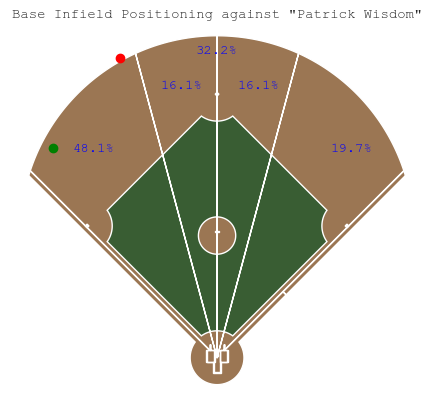

In [8]:
field = MiLBField()
fig, ax = plt.subplots(1, 1)
field.draw(ax=ax, display_range='infield')

field.arrow(
    0, 0, 175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15)), color='white'
)
field.arrow(
    0, 0, -175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15)), color='white'
)
field.arrow(
    0, 0, 0, 175, color='white'
)

# Patrick Wisdom approx spray
# 48.1 pull, 22.84 straight pull
ax.text(-70, 100, '48.1%', color='blue', fontsize=10, zorder=20)
ax.text(-10.5, 147, '32.2%', color='blue', fontsize=10, zorder=22)
ax.text(-27.5, 130, '16.1%', color='blue', fontsize=10, zorder=20)
ax.text(10, 130, '16.1%', color='blue', fontsize=10, zorder=20)
ax.text(55, 100, '19.7%', color='blue', fontsize=10, zorder=20)
ax.set_title('Base Infield Positioning against "Patrick Wisdom"', fontsize=10)

# Examples will be Corey Seager and Bobby Witt Jr.
# 3B: <-37, 48> (pixels), -38deg
# # SS: <-23, 69> (pixels), -18deg
# Pos = |pos_vec| * (127.25 / 60)
field.scatter(
    -128.5*np.sin(np.deg2rad(38)), 128.5*np.cos(np.deg2rad(38)), color='green', zorder=20
)

field.scatter(
    -152.25*np.sin(np.deg2rad(18)), 152.25*np.cos(np.deg2rad(18)), color='red', zorder=20
)

plt.show()